In [91]:
#!pip install pandas

In [16]:
import pandas as pd
import os
from IPython.display import display
import matplotlib.pyplot as plt

# Function to process the CSV and return the path to the filtered temporary file
def filter_csv(input_file_path):
    # Create the output file path by appending "-temp" before the file extension
    base, ext = os.path.splitext(input_file_path)
    output_file_path = base + "-temp" + ext
    first_line = True  # Flag to indicate the first line in the file
    # Open the output file in write mode to start empty
    with open(output_file_path, 'w') as outfile:
        # Read the original file and filter out rows containing "timestamp"
        with open(input_file_path, 'r') as infile:
            for line in infile:
                if first_line or "timestamp" not in line:  # Skip lines containing "timestamp"
                    outfile.write(line)
                    first_line = False
    
    # Return the path of the filtered temporary file
    return output_file_path

# Define the file paths
apiPecker_path = "C:/Personal/ISA/telemetry/oas-telemetry-tester/outputs/response-times-tc01-03.csv"
dockerStats_path = "C:/Personal/ISA/telemetry/oas-telemetry-tester/outputs/docker-stats.csv"

# Filter the files and get the paths to the filtered versions
filtered_apiPecker_path = filter_csv(apiPecker_path)
filtered_dockerStats_path = filter_csv(dockerStats_path)

# Read the filtered API Pecker data
apiPecker_data = pd.read_csv(filtered_apiPecker_path)
print("apiPecker_data after filtering shape:", apiPecker_data.shape)
print(apiPecker_data.dtypes)  # Check data types after filtering

print("-----------------------------------")

# Read the filtered Docker stats data
dockerStats_data = pd.read_csv(filtered_dockerStats_path)
print("dockerStats_data after filtering shape:", dockerStats_data.shape)
print(dockerStats_data.dtypes)  # Check data types after filtering

apiPecker_data after filtering shape: (1794, 28)
timestamp                                  object
responseTime                              float64
testname                                   object
minutesPerTest                              int64
repeatTestCount                             int64
telemetryInApp                               bool
orderOfMagnitude.name                      object
orderOfMagnitude.value                      int64
orderOfMagnitude.estimatedResponseTime      int64
orderOfMagnitude.secureResponseTime         int64
baseURL                                    object
concurrentUsers                             int64
agreementId                                object
currentIteration                            int64
telemetryStatus                            object
requests                                    int64
url                                        object
delay                                       int64
total_heap_size_before                    float64
t

In [19]:
import pandas as pd
from IPython.display import display


# # Remove rows where the timestamp column has the value "timestamp"
# print("Data.shape:", apiPecker_data.shape)
# apiPecker_data = apiPecker_data[apiPecker_data.timestamp != "timestamp"]
# print("Data.shape afer removing headers between data:", apiPecker_data.shape)





# Print the shape of the dataframe (number of rows and columns)

# Display the first few rows of the dataframe
display(apiPecker_data.head(1))
display(dockerStats_data.head(1))


,timestamp,responseTime,testname,minutesPerTest,repeatTestCount,telemetryInApp,orderOfMagnitude.name,orderOfMagnitude.value,orderOfMagnitude.estimatedResponseTime,orderOfMagnitude.secureResponseTime,...,total_heap_size_before,total_heap_size_executable_before,used_heap_size_before,heap_size_limit_before,malloced_memory_before,total_heap_size_after,total_heap_size_executable_after,used_heap_size_after,heap_size_limit_after,malloced_memory_after
0,2024-09-09T22:59:05.083Z,3127.324,TC-001 Registry Enabler,1,3,True,small,1,1500,3000,...,92.098,1.297,62.962,2048,0.094,164.484,2.094,132.364,2048,0.094


,timestamp,testname,baseURL,repeatTestCount,minutesPerTest,concurrentUsers,agreementId,telemetryInApp,orderOfMagnitude.value,orderOfMagnitude.name,...,memory_stats.stats.writeback,memory_stats.limit,precpu_stats.cpu_usage.total_usage,precpu_stats.cpu_usage.usage_in_kernelmode,precpu_stats.cpu_usage.usage_in_usermode,precpu_stats.system_cpu_usage,precpu_stats.online_cpus,precpu_stats.throttling_data.periods,precpu_stats.throttling_data.throttled_periods,precpu_stats.throttling_data.throttled_time
0,2024-09-09T22:59:06.082Z,TC-001 Registry Enabler,http://localhost:5400,3,1,1,tpa-Load-test-GH-motero2k_Bluejay-test-TPA-23-...,True,1,small,...,0,4194304000,4349386161,350000000,3960000000,166003154230000000,8,0,0,0


In [36]:


# Función para calcular el porcentaje de CPU
def calculate_cpu_percent(stats):
    previous_cpu = float(stats['precpu_stats.cpu_usage.total_usage'])
    cpu_delta = stats['cpu_stats.cpu_usage.total_usage']- previous_cpu
    
    previous_system = stats['precpu_stats.system_cpu_usage']
    system_delta = stats['cpu_stats.system_cpu_usage'] - previous_system

    if system_delta > 0.0 and cpu_delta > 0.0:
        cpu_percent = (cpu_delta / system_delta) * stats['cpu_stats.online_cpus'] * 100.0
    else:
        cpu_percent = 0.0
    return cpu_percent

# Aplicamos la función para obtener el porcentaje de CPU y creamos una nueva columna
dockerStats_data['cpu_percent'] = dockerStats_data.apply(calculate_cpu_percent, axis=1)



def calculate_memory_percent(stats):
    used_memory = stats['memory_stats.usage']
    memory_limit = stats['memory_stats.limit']
    return (used_memory / memory_limit) * 100.0

dockerStats_data['memory_percent'] = dockerStats_data.apply(calculate_memory_percent, axis=1)

# Display the first few rows of the dataframe (just memory_percent and cpu_percent columns)
display(dockerStats_data[['memory_percent', 'cpu_percent']].head(10))

,memory_percent,cpu_percent
0,3.074707,98.308907
1,3.077930,6.146521
2,3.856445,128.601343
3,5.038477,96.102181
4,4.137207,121.808611
5,4.151855,4.666108
6,3.864355,106.296586
7,4.717871,100.361350
8,4.716699,1.425256
9,5.287500,98.100621


In [38]:


no_index_data = apiPecker_data.copy()
# convert to float responseTime and used_heap+size_after
no_index_data['responseTime'] = no_index_data['responseTime'].astype(float)
no_index_data['used_heap_size_after'] = no_index_data['used_heap_size_after'].astype(float)

tc01_data = no_index_data[no_index_data['testname'].str.contains("TC-001")]
tc02_data = no_index_data[no_index_data['testname'].str.contains("TC-002")]
tc03_data = no_index_data[no_index_data['testname'].str.contains("TC-003")]

no_index_data_docker = dockerStats_data.copy()
tc01_data_docker = no_index_data_docker[no_index_data_docker['testname'].str.contains("TC-001")]
tc02_data_docker = no_index_data_docker[no_index_data_docker['testname'].str.contains("TC-002")]
tc03_data_docker = no_index_data_docker[no_index_data_docker['testname'].str.contains("TC-003")]


print("API PECKER")
display(tc01_data.head(1))
display(tc02_data.head(1))
display(tc03_data.head(1))
print("DOCKER")
display(tc01_data_docker.head(1))
display(tc02_data_docker.head(1))
display(tc03_data_docker.head(1))


API PECKER


,timestamp,responseTime,testname,minutesPerTest,repeatTestCount,telemetryInApp,orderOfMagnitude.name,orderOfMagnitude.value,orderOfMagnitude.estimatedResponseTime,orderOfMagnitude.secureResponseTime,...,total_heap_size_before,total_heap_size_executable_before,used_heap_size_before,heap_size_limit_before,malloced_memory_before,total_heap_size_after,total_heap_size_executable_after,used_heap_size_after,heap_size_limit_after,malloced_memory_after
0,2024-09-09T22:59:05.083Z,3127.324,TC-001 Registry Enabler,1,3,True,small,1,1500,3000,...,92.098,1.297,62.962,2048,0.094,164.484,2.094,132.364,2048,0.094


,timestamp,responseTime,testname,minutesPerTest,repeatTestCount,telemetryInApp,orderOfMagnitude.name,orderOfMagnitude.value,orderOfMagnitude.estimatedResponseTime,orderOfMagnitude.secureResponseTime,...,total_heap_size_before,total_heap_size_executable_before,used_heap_size_before,heap_size_limit_before,malloced_memory_before,total_heap_size_after,total_heap_size_executable_after,used_heap_size_after,heap_size_limit_after,malloced_memory_after
156,2024-09-09T23:17:05.421Z,3168.312,TC-002 Registry Intervals,1,1,True,small,1,1500,3000,...,91.852,1.297,60.352,2048,0.094,153.484,2.094,100.904,2048,0.094


,timestamp,responseTime,testname,minutesPerTest,repeatTestCount,telemetryInApp,orderOfMagnitude.name,orderOfMagnitude.value,orderOfMagnitude.estimatedResponseTime,orderOfMagnitude.secureResponseTime,...,total_heap_size_before,total_heap_size_executable_before,used_heap_size_before,heap_size_limit_before,malloced_memory_before,total_heap_size_after,total_heap_size_executable_after,used_heap_size_after,heap_size_limit_after,malloced_memory_after
234,2024-09-09T23:26:05.241Z,3196.087,TC-003 Registry Enabler Long Run,30,1,True,small,1,1500,3000,...,92.098,1.297,66.551,2048,0.094,153.984,2.094,101.881,2048,0.094


DOCKER


,timestamp,testname,baseURL,repeatTestCount,minutesPerTest,concurrentUsers,agreementId,telemetryInApp,orderOfMagnitude.value,orderOfMagnitude.name,...,precpu_stats.cpu_usage.total_usage,precpu_stats.cpu_usage.usage_in_kernelmode,precpu_stats.cpu_usage.usage_in_usermode,precpu_stats.system_cpu_usage,precpu_stats.online_cpus,precpu_stats.throttling_data.periods,precpu_stats.throttling_data.throttled_periods,precpu_stats.throttling_data.throttled_time,cpu_percent,memory_percent
0,2024-09-09T22:59:06.082Z,TC-001 Registry Enabler,http://localhost:5400,3,1,1,tpa-Load-test-GH-motero2k_Bluejay-test-TPA-23-...,True,1,small,...,4349386161,350000000,3960000000,166003154230000000,8,0,0,0,98.308907,3.074707


,timestamp,testname,baseURL,repeatTestCount,minutesPerTest,concurrentUsers,agreementId,telemetryInApp,orderOfMagnitude.value,orderOfMagnitude.name,...,precpu_stats.cpu_usage.total_usage,precpu_stats.cpu_usage.usage_in_kernelmode,precpu_stats.cpu_usage.usage_in_usermode,precpu_stats.system_cpu_usage,precpu_stats.online_cpus,precpu_stats.throttling_data.periods,precpu_stats.throttling_data.throttled_periods,precpu_stats.throttling_data.throttled_time,cpu_percent,memory_percent
734,2024-09-09T23:17:06.421Z,TC-002 Registry Intervals,http://localhost:5400,1,1,1,tpa-Load-test-GH-motero2k_Bluejay-test-TPA-23-...,True,1,small,...,4389259399,400000000,3960000000,166011776810000000,8,0,0,0,97.493055,3.064844


,timestamp,testname,baseURL,repeatTestCount,minutesPerTest,concurrentUsers,agreementId,telemetryInApp,orderOfMagnitude.value,orderOfMagnitude.name,...,precpu_stats.cpu_usage.total_usage,precpu_stats.cpu_usage.usage_in_kernelmode,precpu_stats.cpu_usage.usage_in_usermode,precpu_stats.system_cpu_usage,precpu_stats.online_cpus,precpu_stats.throttling_data.periods,precpu_stats.throttling_data.throttled_periods,precpu_stats.throttling_data.throttled_time,cpu_percent,memory_percent
1109,2024-09-09T23:26:06.240Z,TC-003 Registry Enabler Long Run,http://localhost:5400,1,30,1,tpa-Load-test-GH-motero2k_Bluejay-test-TPA-23-...,True,1,small,...,5658962526,540000000,5150000000,166016082750000000,8,0,0,0,85.519744,3.358887


In [49]:
# TEST TYPE 1 = (TLM vs NO_TLM)
#Relative change 
def tc01_relative_change(tc01_data, columns, columns_names):
    for i in range(len(columns)):
        column = columns[i]
        column_name = columns_names[i]
        #create figure
        fig, ax = plt.subplots()
        ax.set_title("Relative Change in " + column_name + " between TLM and NO_TLM")

        ax.set_ylabel(column_name+" difference")

        ax.set_xlabel("Problem difficulty order")
        for orderOfMagnitude in ["small","medium","large"]:
            print("\nOrder of magnitude: ", orderOfMagnitude)
            TLM_data = tc01_data.loc[(tc01_data['telemetryInApp'] == True) & (tc01_data['orderOfMagnitude.name'] == orderOfMagnitude),column]
            TLM_mean = TLM_data.mean()
            print("TELEMETRY")
            print("- mean: ", TLM_mean)
            stv = TLM_data.std()
            print("- std: ", stv)

            NO_TLM_data = tc01_data.loc[(tc01_data['telemetryInApp'] == False) & (tc01_data['orderOfMagnitude.name'] == orderOfMagnitude),column]
            NO_TLM_mean = NO_TLM_data.mean()
            print("NO TELEMETRY")
            print("- mean: ", NO_TLM_mean)
            stv = NO_TLM_data.std()
            print("- std: ", stv)

            relative_change = (TLM_mean - NO_TLM_mean) / NO_TLM_mean
            ax.bar(orderOfMagnitude, relative_change)
        #save as png in /plots
        plt.savefig("Test1_"+column+"_relative_change.png")
        # Save the figure as a PNG file
        plt.show()

    





Order of magnitude:  small
TELEMETRY
- mean:  2318.102911111111
- std:  644.1353896282147
NO TELEMETRY
- mean:  2343.278888888889
- std:  667.8942370906974

Order of magnitude:  medium
TELEMETRY
- mean:  5390.859523809523
- std:  573.49449542246
NO TELEMETRY
- mean:  5443.927857142857
- std:  549.2893937854878

Order of magnitude:  large
TELEMETRY
- mean:  8827.719916666667
- std:  1366.366949544964
NO TELEMETRY
- mean:  9302.323666666667
- std:  2073.4868232359595


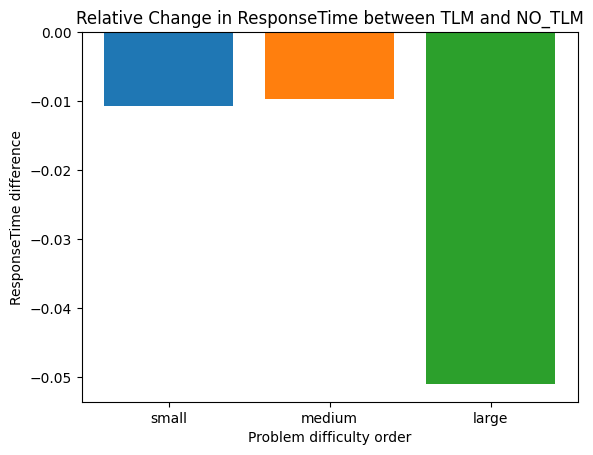

In [51]:
columns = ["responseTime"] #"used_heap_size_after"
columns_names = ["ResponseTime"] #,"Used Memory"
tc01_relative_change(tc01_data, columns, columns_names)


Order of magnitude:  small
TELEMETRY
- mean:  74.96903036172063
- std:  40.56601973022071
NO TELEMETRY
- mean:  75.12235877042137
- std:  40.021774288925144

Order of magnitude:  medium
TELEMETRY
- mean:  102.79808326701907
- std:  47.59020073679152
NO TELEMETRY
- mean:  103.65492336559605
- std:  48.805663888383584

Order of magnitude:  large
TELEMETRY
- mean:  108.73354203017746
- std:  50.3252741715822
NO TELEMETRY
- mean:  108.12373702282524
- std:  53.283085127808384


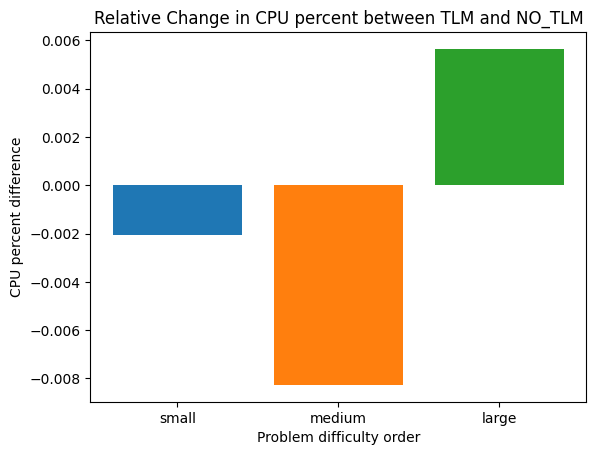


Order of magnitude:  small
TELEMETRY
- mean:  4.847479717548077
- std:  0.6349313223722081
NO TELEMETRY
- mean:  4.782116135817308
- std:  0.6432146114730205

Order of magnitude:  medium
TELEMETRY
- mean:  8.612021246189025
- std:  2.485475317946672
NO TELEMETRY
- mean:  8.647059197154473
- std:  2.5736554397528737

Order of magnitude:  large
TELEMETRY
- mean:  10.14602115597345
- std:  4.179760624566069
NO TELEMETRY
- mean:  11.55487007472826
- std:  4.232963492518061


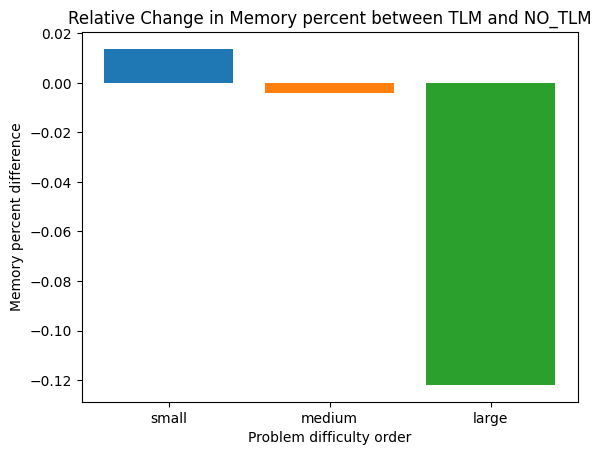

In [52]:
columns = ["cpu_percent","memory_percent"]
columns_names = ["CPU percent","Memory percent"]
tc01_relative_change(tc01_data_docker, columns, columns_names)

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

# Now tc01 but in a 6-column boxplot

def tc01_boxplot(tc01_data, columns, columns_names):
    for i in range(len(columns)):
        column = columns[i]
        column_name = columns_names[i]
        
        # Create figure and axis
        fig, ax = plt.subplots(figsize=(8, 6))  # Adjust size as needed
        
        data1_arrays = []
        for orderOfMagnitude in ["small", "medium", "large"]:
            print("\nOrder of magnitude: ", orderOfMagnitude)
            
            # Get data for TLM (telemetry enabled)
            TLM_data = tc01_data.loc[(tc01_data['telemetryInApp'] == True) & (tc01_data['orderOfMagnitude.name'] == orderOfMagnitude), column]
            TLM_mean = TLM_data.mean()
            TLM_max = TLM_data.max()
            TLM_min = TLM_data.min()

            print("TELEMETRY", column_name)
            print(" - min: ", TLM_min)
            print(" - max: ", TLM_max)
            print("- mean: ", TLM_mean)
            print("- std: ", TLM_data.std())

            # Get data for NO_TLM (telemetry disabled)
            NO_TLM_data = tc01_data.loc[(tc01_data['telemetryInApp'] == False) & (tc01_data['orderOfMagnitude.name'] == orderOfMagnitude), column]
            NO_TLM_mean = NO_TLM_data.mean()
            print("NO TELEMETRY", column_name)
            print("- min: ", NO_TLM_data.min())
            print("- max: ", NO_TLM_data.max())
            print("- mean: ", NO_TLM_mean)
            print("- std: ", NO_TLM_data.std())

            # Append data to arrays for boxplot
            data1_arrays.append(NO_TLM_data)
            data1_arrays.append(TLM_data)
        
        # Create boxplot with specific labels
        ax.boxplot(data1_arrays, labels=[
            "small\nNO_TLM", "small\nTLM", 
            "medium\nNO_TLM", "medium\nTLM", 
            "large\nNO_TLM", "large\nTLM"
        ])

        # Add title and format
        fig.suptitle(f"{column_name} for TC-01", fontsize=14)
        
        # Adjust layout to prevent label overlap
        plt.tight_layout(rect=[0, 0, 1, 0.96])  # Reserve space for the title

        # Save the figure as a PNG file
        fig.savefig(f"Test1_6boxplot_{column}_boxplot.png")

        #x-axis label
        ax.set_xlabel("Problem difficulty (order of magnitude) by telemetry status", fontsize=13)
        #y-axis label
        ax.set_ylabel(column_name, fontsize=13)
        #bigger labels

        # Show the plot
        plt.show()



Order of magnitude:  small
TELEMETRY Response Time (ms)
 - min:  1715.623
 - max:  4420.919
- mean:  2318.102911111111
- std:  644.1353896282147
NO TELEMETRY Response Time (ms)
- min:  1747.284
- max:  4366.219
- mean:  2343.278888888889
- std:  667.8942370906974

Order of magnitude:  medium
TELEMETRY Response Time (ms)
 - min:  4649.321
 - max:  6341.605
- mean:  5390.859523809523
- std:  573.49449542246
NO TELEMETRY Response Time (ms)
- min:  4721.534
- max:  6318.217
- mean:  5443.927857142857
- std:  549.2893937854878

Order of magnitude:  large
TELEMETRY Response Time (ms)
 - min:  7361.908
 - max:  11173.395
- mean:  8827.719916666667
- std:  1366.366949544964
NO TELEMETRY Response Time (ms)
- min:  7341.104
- max:  13246.567
- mean:  9302.323666666667
- std:  2073.4868232359595


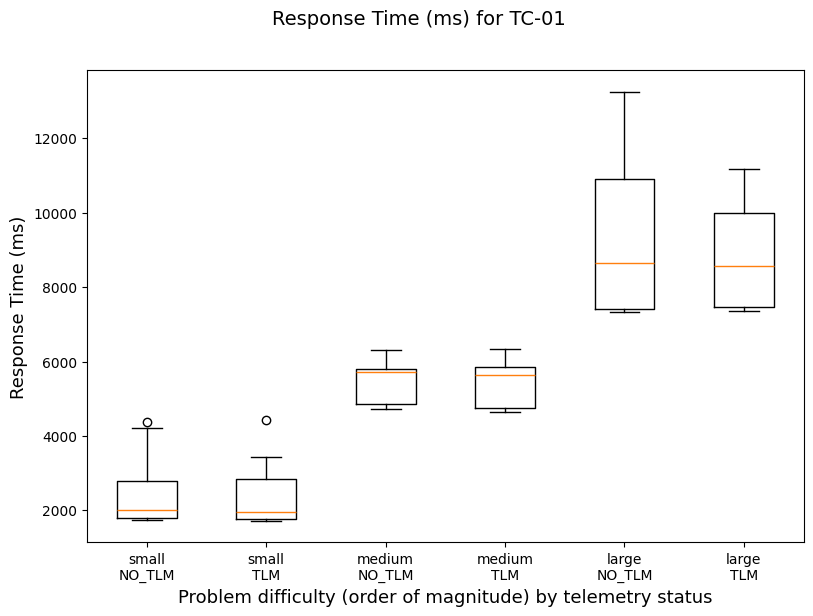

In [55]:
columns = ["responseTime"]#, "used_heap_size_after"]
columns_names = ["Response Time (ms)"]#, "Used Memory (MB)"]
tc01_boxplot(tc01_data, columns, columns_names)


Order of magnitude:  small
TELEMETRY CPU Percent
 - min:  1.4252559798994975
 - max:  132.5621188972431
- mean:  74.96903036172063
- std:  40.56601973022071
NO TELEMETRY CPU Percent
- min:  0.7616568
- max:  131.1574543
- mean:  75.12235877042137
- std:  40.021774288925144

Order of magnitude:  medium
TELEMETRY CPU Percent
 - min:  4.753021722846442
 - max:  172.8287432
- mean:  102.79808326701907
- std:  47.59020073679152
NO TELEMETRY CPU Percent
- min:  4.375035422885572
- max:  180.67198597014925
- mean:  103.65492336559605
- std:  48.805663888383584

Order of magnitude:  large
TELEMETRY CPU Percent
 - min:  0.0
 - max:  202.0477812608158
- mean:  108.73354203017746
- std:  50.3252741715822
NO TELEMETRY CPU Percent
- min:  0.01574063371356147
- max:  215.60604785982477
- mean:  108.12373702282524
- std:  53.283085127808384


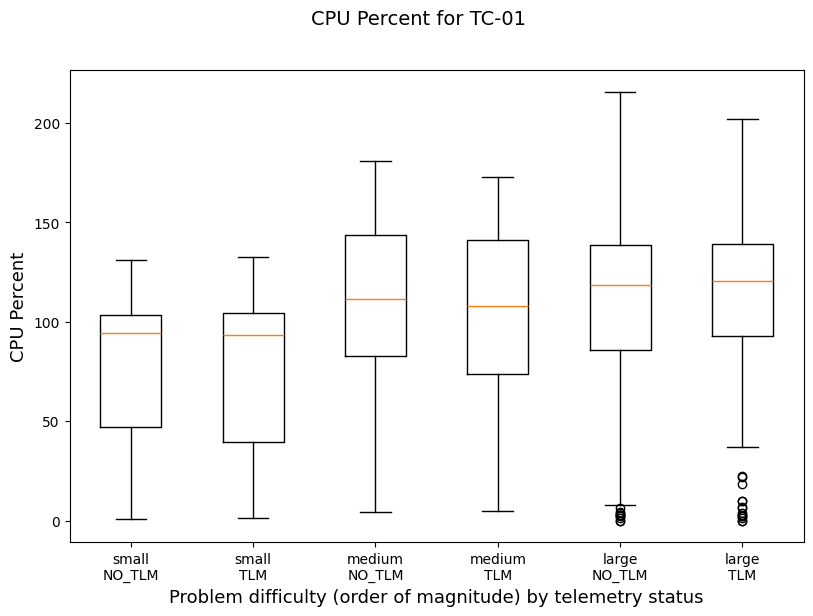


Order of magnitude:  small
TELEMETRY Memory Percent
 - min:  3.07470703125
 - max:  6.8484375
- mean:  4.847479717548077
- std:  0.6349313223722081
NO TELEMETRY Memory Percent
- min:  3.0845703125
- max:  6.78369140625
- mean:  4.782116135817308
- std:  0.6432146114730205

Order of magnitude:  medium
TELEMETRY Memory Percent
 - min:  3.2855468749999996
 - max:  14.51474609375
- mean:  8.612021246189025
- std:  2.485475317946672
NO TELEMETRY Memory Percent
- min:  3.3015625
- max:  14.948632812500001
- mean:  8.647059197154473
- std:  2.5736554397528737

Order of magnitude:  large
TELEMETRY Memory Percent
 - min:  3.08935546875
 - max:  18.17978515625
- mean:  10.14602115597345
- std:  4.179760624566069
NO TELEMETRY Memory Percent
- min:  3.0536132812499996
- max:  19.51171875
- mean:  11.55487007472826
- std:  4.232963492518061


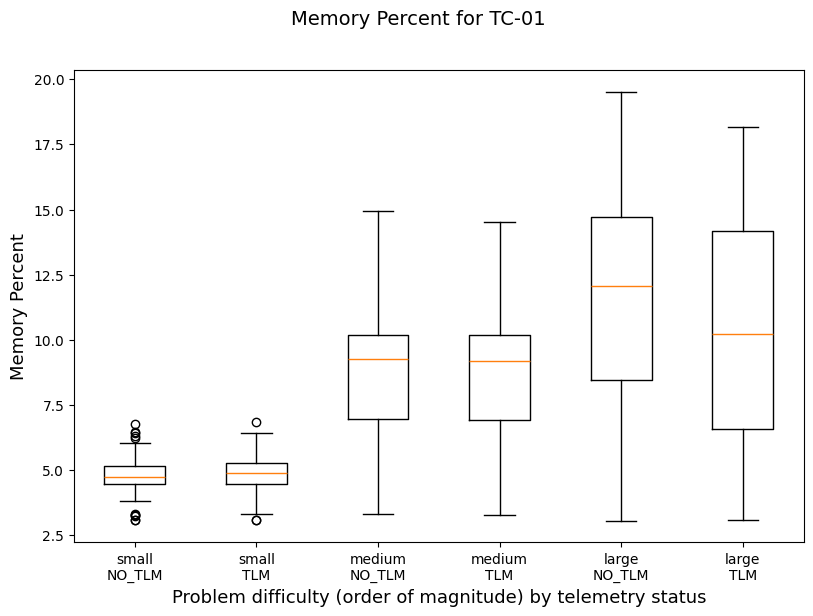

In [56]:
columns = ["cpu_percent", "memory_percent"]
columns_names = ["CPU Percent", "Memory Percent"]
tc01_boxplot(tc01_data_docker, columns, columns_names)

In [57]:

# TEST TYPE 2

# Define replacements
# replaceDict = {
#     "STARTED": "1 STARTED",
#     "STOPPED": "2 STOPPED",
#     "RESTARTED": "3 RESTARTED"
# }

def getOrderOfMagnitudeValue(name):
    if name == "small":
        return 1
    if name == "medium":
        return 24
    if name == "large":
        return 24*2

def print_boxplot(data, column,column_name, order):
    data.loc[:, column] = pd.to_numeric(data[column], errors='coerce')
    data_clean = data.dropna(subset=[column])
    data_clean.boxplot(column=column, by='telemetryStatus', figsize=(8, 6))
    plt.title(column_name+" by phases of the test. \nOrder of the problem size: "+order)
    plt.suptitle('')
    plt.ylabel(column_name)
    plt.xlabel("Phases of the tests")
    plt.ylim(0)
    plt.gca().spines[['top', 'right']].set_visible(False)

    # plt.savefig("./plots/Test2_"+column+"_"+order+".png")
    plt.show()






In [58]:
def tc02_box_plot(tc02_data, columns, columns_names):
    for i in range(len(columns)):
        column = columns[i]
        column_name = columns_names[i]
        for orderOfMagnitude in ["small", "medium", "large"]:
            print("\nOrder of magnitude: ", orderOfMagnitude)
            data2_in_order = tc02_data[tc02_data['orderOfMagnitude.name'] == orderOfMagnitude]
            print_boxplot(data2_in_order, column, column_name, orderOfMagnitude)



(78, 28)
(78, 28)

Order of magnitude:  small


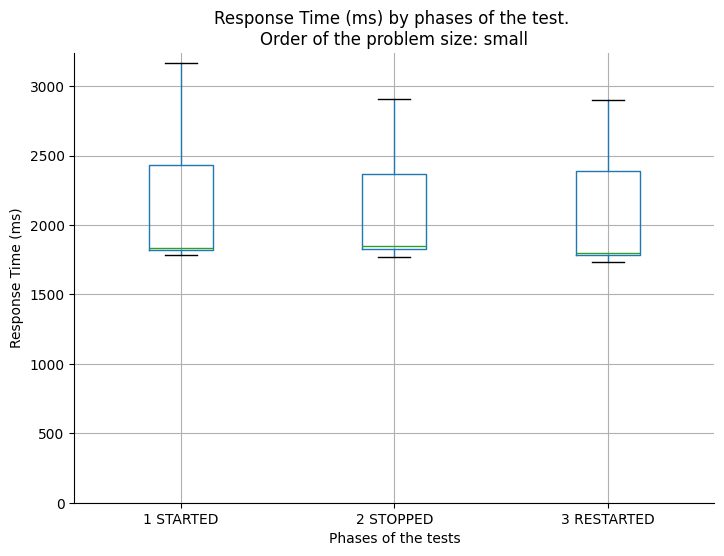


Order of magnitude:  medium


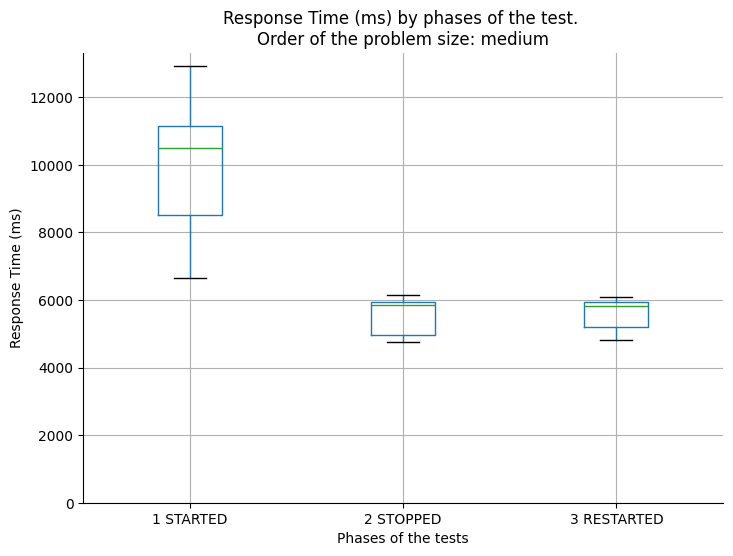


Order of magnitude:  large


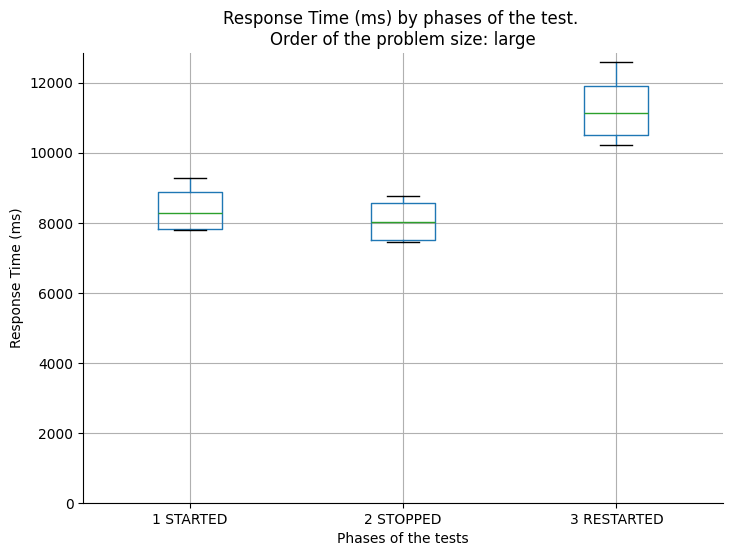

In [60]:
# Replace values in the column
print(tc02_data.shape)
# tc02_data['telemetryStatus'] = tc02_data['telemetryStatus'].replace(replaceDict)
print(tc02_data.shape)
columns = ["responseTime"]#, "used_heap_size_after"]
columns_names = ["Response Time (ms)"]#, "Used Memory (MB)"]
tc02_box_plot(tc02_data, columns, columns_names)


Order of magnitude:  small


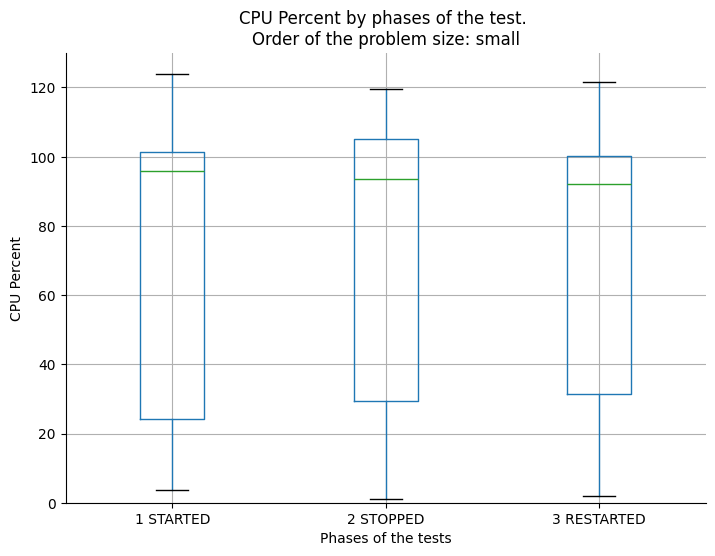


Order of magnitude:  medium


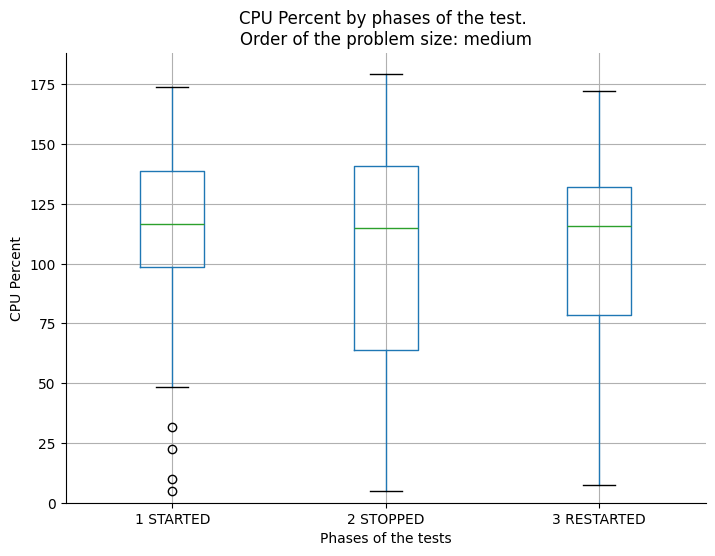


Order of magnitude:  large


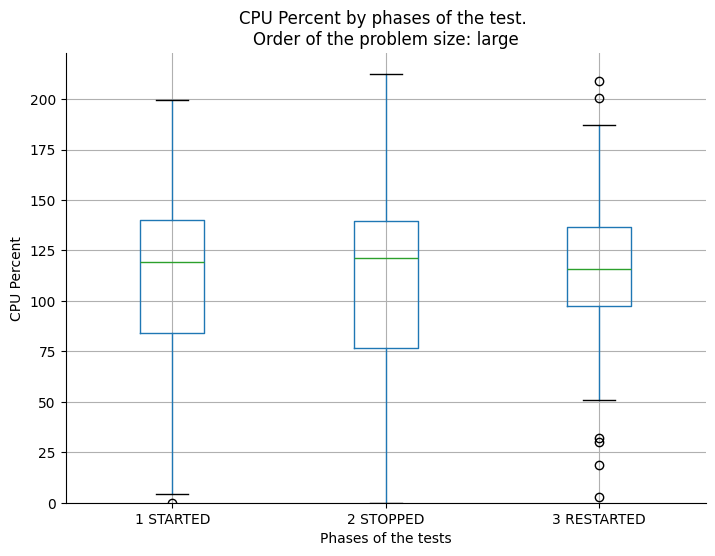


Order of magnitude:  small


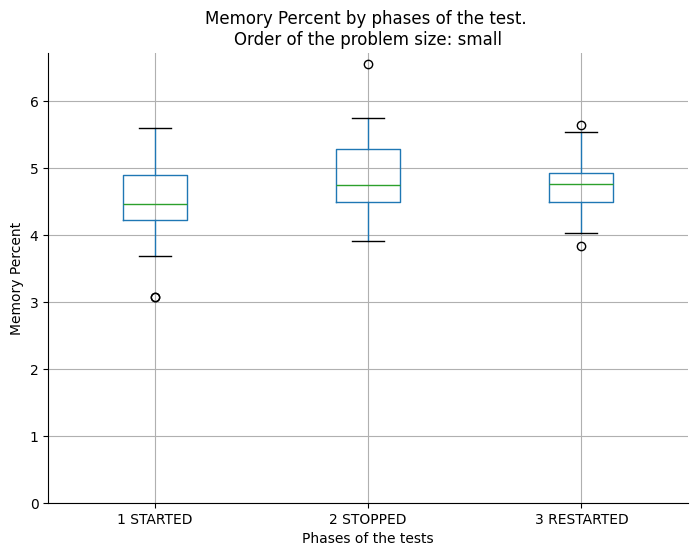


Order of magnitude:  medium


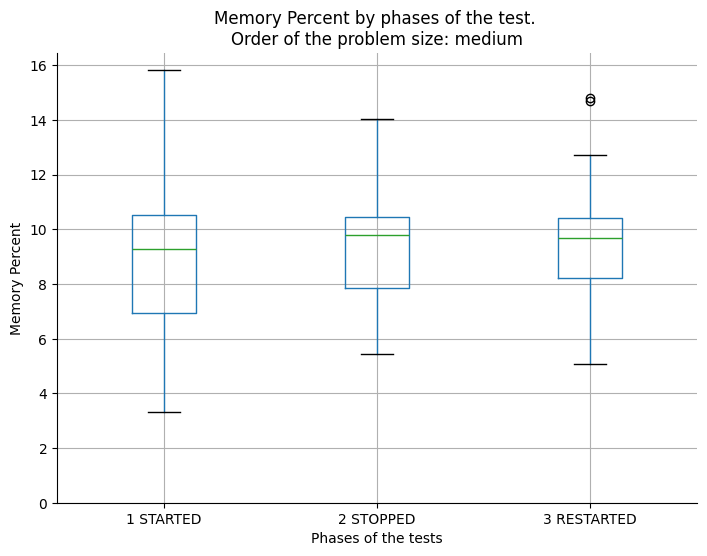


Order of magnitude:  large


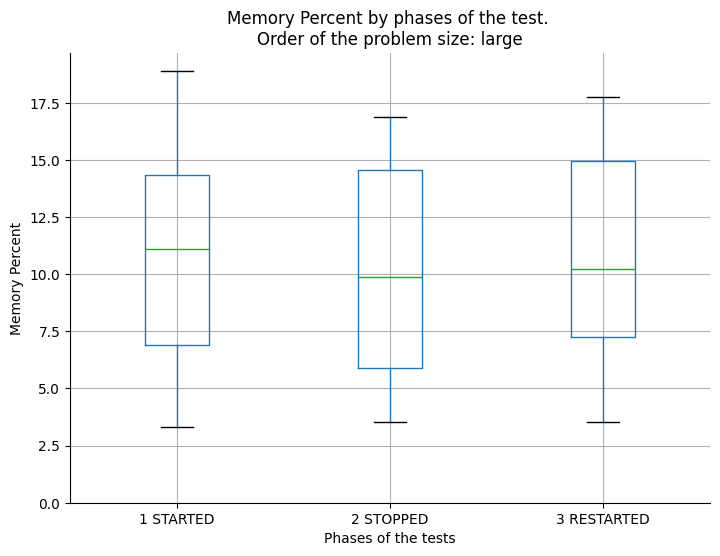

In [62]:
# tc02_data_docker['telemetryStatus'] = tc02_data_docker['telemetryStatus'].replace(replaceDict)
columns = ["cpu_percent", "memory_percent"]
columns_names = ["CPU Percent", "Memory Percent"]
tc02_box_plot(tc02_data_docker, columns, columns_names)

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

def tc03_plot(tc03_data, columns, columns_names, totalTime=30*60, window_size=100):
    orderOfMagnitudeNames = ["small", "medium", "large"]
    telemetryInAppValues = [True, False]
    
    # Function to compute moving average
    def moving_average(data, window_size):
        return data.rolling(window=window_size, min_periods=1).mean()

    # Plot data for different combinations of orderOfMagnitude and telemetryInApp
    for i in range(len(columns)):
        plt.figure(figsize=(10, 6))
        column = columns[i]
        column_name = columns_names[i]
        
        for orderOfMagnitude in orderOfMagnitudeNames:
            for telemetryInApp in telemetryInAppValues:
                # Filter the data
                data3 = tc03_data[tc03_data['orderOfMagnitude.name'] == orderOfMagnitude]
                data3 = data3[data3['telemetryInApp'] == telemetryInApp]
                print("telemetryInApp: ", telemetryInApp, " orderOfMagnitude: ", orderOfMagnitude, "n: ", len(data3))
                
                # Convert to numeric and compute moving average
                x_values = [i * totalTime / len(data3) for i in range(len(data3))]
                data3[column] = pd.to_numeric(data3[column], errors='coerce')
                data3 = data3.dropna(subset=[column])  # Drop rows with NaN values
                moving_avg = moving_average(data3[column], window_size)
                
                telemetryName = "TLM" if telemetryInApp else "NO_TLM"
                plt.plot(x_values, moving_avg, label=f'{telemetryName}, Order: {orderOfMagnitude}', marker='o', linestyle='-', linewidth=1, markersize=1)

        # Add labels and title
        plt.xlabel('Time (s)')
        plt.ylabel(f'Moving Average of {column_name}')
        plt.title(f'Moving Average of {column_name} over time for different configurations')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.gca().spines[['top', 'right']].set_visible(False)
        plt.show()


telemetryInApp:  True  orderOfMagnitude:  small n:  450
telemetryInApp:  False  orderOfMagnitude:  small n:  450
telemetryInApp:  True  orderOfMagnitude:  medium n:  210
telemetryInApp:  False  orderOfMagnitude:  medium n:  210
telemetryInApp:  True  orderOfMagnitude:  large n:  120
telemetryInApp:  False  orderOfMagnitude:  large n:  120


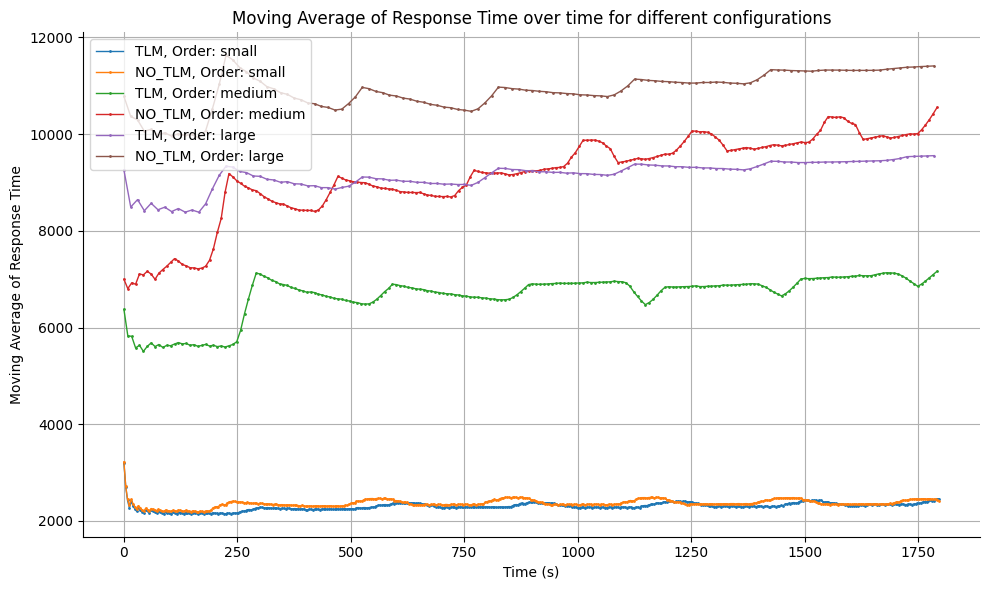

In [110]:
columns = ["responseTime"]#,"used_heap_size_after"]
columns_names = ["Response Time"]#,"Used Memory (MB)"]
tc03_plot(tc03_data, columns, columns_names)

telemetryInApp:  True  orderOfMagnitude:  small n:  1296
telemetryInApp:  False  orderOfMagnitude:  small n:  1297
telemetryInApp:  True  orderOfMagnitude:  medium n:  1301
telemetryInApp:  False  orderOfMagnitude:  medium n:  1416
telemetryInApp:  True  orderOfMagnitude:  large n:  1160
telemetryInApp:  False  orderOfMagnitude:  large n:  1235


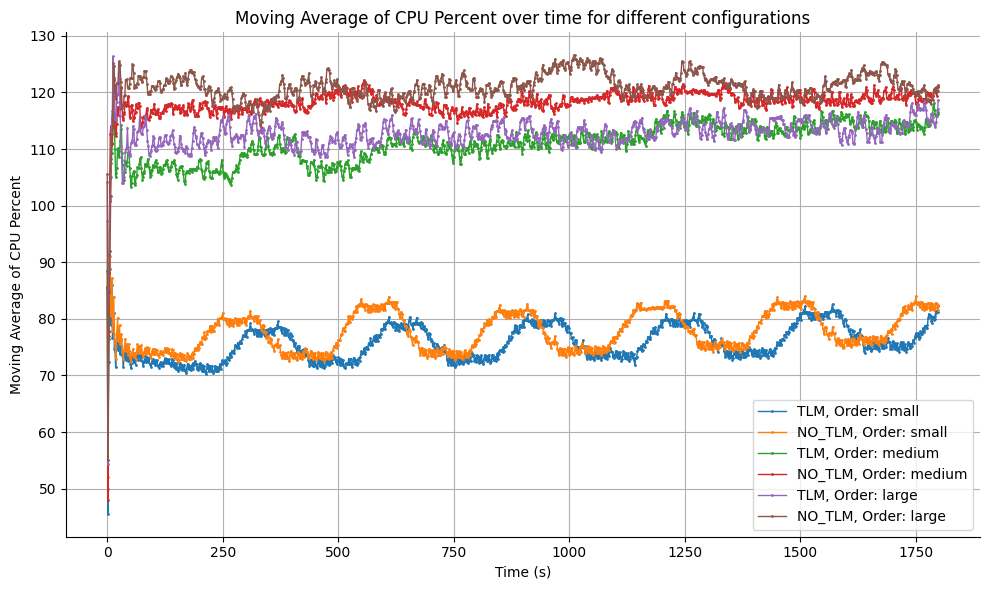

telemetryInApp:  True  orderOfMagnitude:  small n:  1296
telemetryInApp:  False  orderOfMagnitude:  small n:  1297
telemetryInApp:  True  orderOfMagnitude:  medium n:  1301
telemetryInApp:  False  orderOfMagnitude:  medium n:  1416
telemetryInApp:  True  orderOfMagnitude:  large n:  1160
telemetryInApp:  False  orderOfMagnitude:  large n:  1235


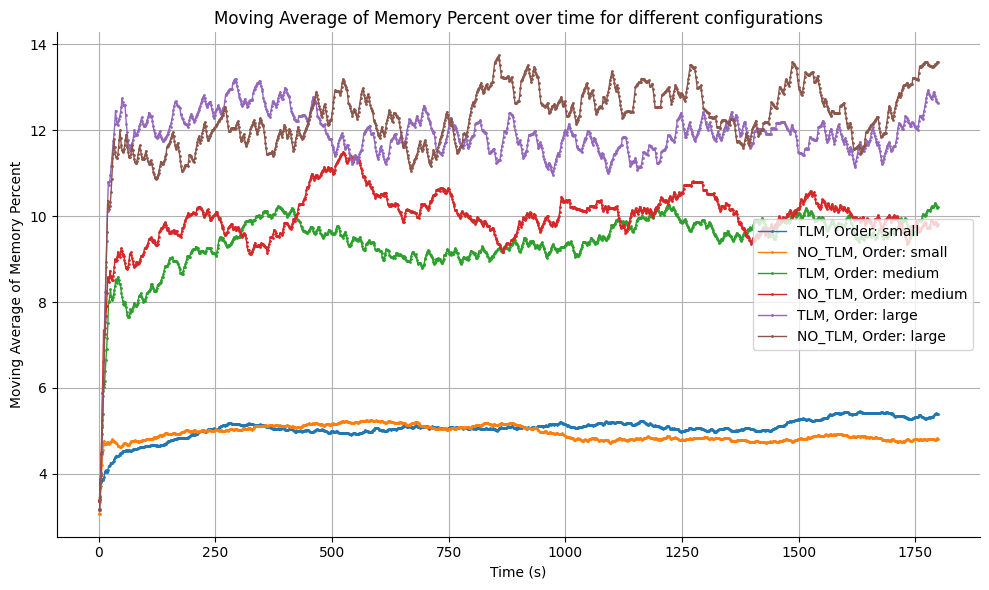

In [111]:
columns = ["cpu_percent","memory_percent"]
columns_names = ["CPU Percent","Memory Percent"]
tc03_plot(tc03_data_docker, columns, columns_names)